# Install & Import Libraries

In [1]:
!pip install neattext seaborn joblib --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 4.0 MB/s eta 0:00:00


# Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/train.txt', sep=';', names=['text', 'emotion'])
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# Clean the Text

In [3]:
df['clean_text'] = df['text'].apply(nfx.remove_userhandles)
df['clean_text'] = df['clean_text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)

# Visualize Emotion Distribution

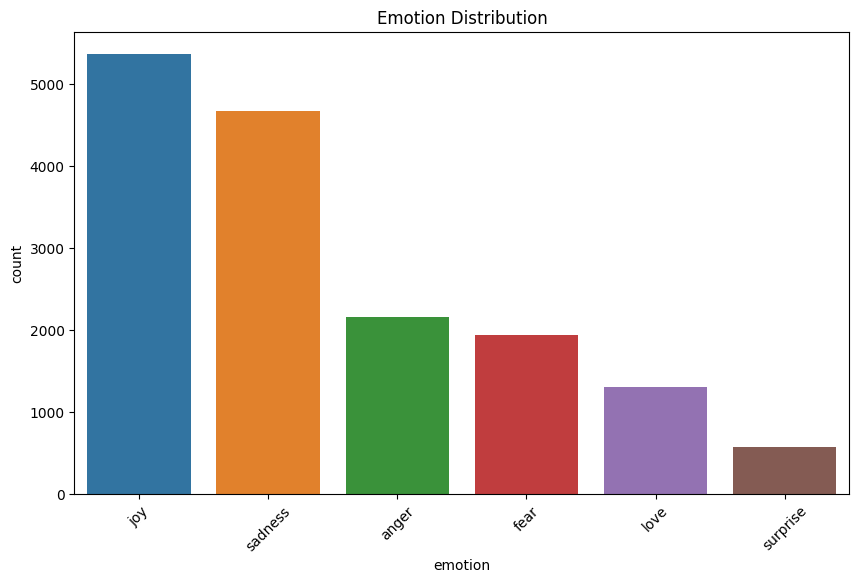

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Emotion Distribution")
plt.show()

# Train/Test Split & Vectorization

In [5]:
X = df['clean_text']
y = df['emotion']

# Vectorizer
tfidf = TfidfVectorizer()
X_vect = tfidf.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Train Model (Logistic Regression)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluate Model

In [7]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8559375

Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.80      0.85       427
        fear       0.86      0.75      0.80       397
         joy       0.80      0.97      0.87      1021
        love       0.89      0.58      0.70       296
     sadness       0.91      0.94      0.92       946
    surprise       0.87      0.46      0.60       113

    accuracy                           0.86      3200
   macro avg       0.87      0.75      0.79      3200
weighted avg       0.86      0.86      0.85      3200



# Save Model & Vectorizer

In [8]:
joblib.dump(model, "emotion_model.pkl")
joblib.dump(tfidf, "vectorizer.pkl")

['vectorizer.pkl']

# Predict New Emotions

In [12]:
def predict_emotion(text):
    cleaned = nfx.remove_stopwords(nfx.remove_punctuations(text))
    vect_text = tfidf.transform([cleaned])
    prediction = model.predict(vect_text)
    return prediction[0]

# Test it
print(predict_emotion("i spent the last two weeks of school feeling miserable"))

sadness
